# Threshold & GMM Analysis

Starting GMM Cluster
Image reshape
Initialization 0
  Iteration 0	 time lapse 10.73788s	 ll change inf
Initialization converged: True	 time lapse 15.91571s	 ll -7.74442
Fitting GMM
Threshold chosen 8379
Thresholding done successfully
detector threshold 8379
Precision: 0.403
Recall: 0.676
F-Measure: 0.5049638554216868




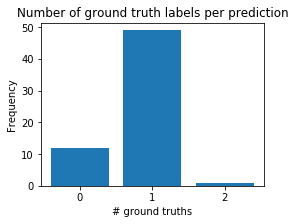

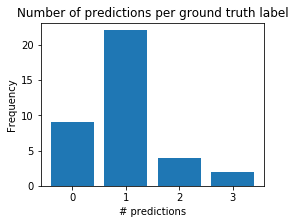

In [9]:
%reload_ext autoreload
%autoreload 2
from IPython.core.pylabtools import figsize
figsize(4, 3)

from tifffile import imread, imsave
from bloby.BlobDetector import BlobDetector
from bloby.BlobMetrics import BlobMetrics
from sklearn.mixture import GaussianMixture
import bloby.util as util
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from datetime import datetime
from skimage import morphology, transform
from skimage.filters import gaussian
from skimage.feature import blob_log
from datetime import datetime

start = datetime.now()

plt.set_cmap('gray')

source_dict = {
    'cell_detection_0': 'COLM',
    'cell_detection_1': 'COLM',
    'cell_detection_2': 'COLM',
    'cell_detection_3': 'COLM',
    'cell_detection_4': 'laVision',
    'cell_detection_5': 'laVision',
    'cell_detection_6': 'laVision',
    'cell_detection_7': 'laVision',
    'cell_detection_8': 'laVision',
    'cell_detection_9': 'laVision'
}

exp_name = 'cell_detection_0'

input_tif_path = '../data/s3617/tifs/{}.tiff'.format(exp_name)
output_csv_path = '../data/s3617/prediction_csv/{}.csv'.format(exp_name)
img = imread(input_tif_path)

ground_truth_path = '../data/s3617/annotations/{}.csv'.format(exp_name)
ground_truth = util.get_list_from_csv(ground_truth_path)

detector = BlobDetector(input_tif_path, data_source=source_dict[exp_name], verbose=True)
centroids = np.asarray(detector.get_blob_centroids())
centroids = util.get_list_from_csv('../../nd-multicore/process_folder/final.csv')
util.write_list_to_csv(centroids, output_csv_path)
util.plot_csv_on_rgb_tif(ground_truth, 'denoised.tiff', 'denoised.tiff', color=[img.max(), 0, 0])
#util.plot_csv_on_rgb_tif(centroids, 'marked_final.tiff', 'marked_final.tiff', color=[img.max(), 0, 0])

print('detector threshold', detector.threshold)

metrics = BlobMetrics(ground_truth, centroids)
print('Precision: {}\nRecall: {}\nF-Measure: {}\n\n'.format(metrics.precision(), metrics.recall(), metrics.f_measure()))
metrics.plot_ground_truths_per_prediction()
metrics.plot_predictions_per_ground_truth()
